# 5. Percentage of neighbhour of same class among the K ANNs

One of the question was to compute the percentage of ANN that are of the same class of the object. We can compute that from the affinity we used earlier in the t-SNE run.

In [105]:
dataset = "mnist-70k" # could also be one of: "mnist-70k", "mnist-fashion", "macosko"
(X_train, y_train, X_test, y_test) = tools.get_dataset(dataset)

In [106]:
%time aff = openTSNE.affinity.PerplexityBasedNN(X_train, n_jobs=8)

CPU times: user 3min 26s, sys: 8.67 s, total: 3min 35s
Wall time: 1min 20s


In [108]:
neighbors = aff._PerplexityBasedNN__neighbors

In [109]:
knn_perf_mnist_70k = []
for i in range(neighbors.shape[1]):
    knn_perf_mnist_70k.append(np.mean(np.mean(y_train[neighbors[:, :i]] == y_train[:, None], axis=1)))

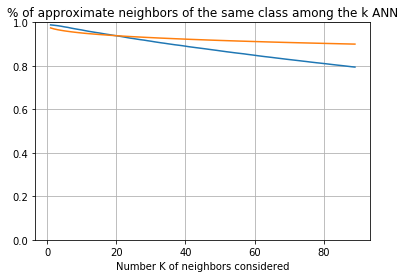

In [110]:
fig, ax = plt.subplots()
ax.plot(knn_perf)
ax.plot(knn_perf_mnist_70k)
ax.set_xlabel("Number K of neighbors considered")
ax.grid(True)
ax.set_ylim([0,1])
_=ax.set_title("% of approximate neighbors of the same class among the k ANN")

# 6. Distribution of distances

Tnis is quite interesting to identify the complexity or richness of a dataset.

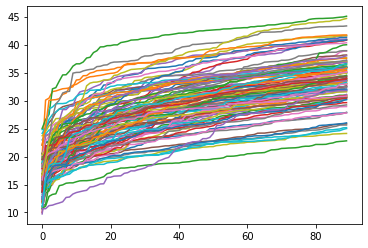

In [33]:
fig, ax = plt.subplots()

for i in aff._PerplexityBasedNN__distances[np.random.randint(0, X_train.shape[0], size=100)]:
    ax.plot(i)